In [ ]:
!pip install -q pyLDAvis==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.8 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 869.5 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Data Preparation

In [ ]:
import pandas as pd

# Load datasets
# business_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp_dataset/business_FL_output.csv')
business_df = pd.read_csv('/content/drive/MyDrive/CIS 509/CIS 509_Course Project/business_FL_output.csv')
review_df = pd.read_csv('/content/drive/MyDrive/CIS 509/CIS 509_Course Project/filtered_review_FL_output.csv')
business_all_df = pd.read_json('/content/drive/MyDrive/CIS 509/CIS 509_Course Project/yelp_academic_dataset_business.json', lines=True)

# Filter for Japanese restaurants
fl_japanese_restaurants = business_df[business_df['categories'].str.contains("Japanese", na=False)]

# Filter for reviews for Japanese restaurants in Florida
fl_japanese_reviews = review_df[review_df['business_id'].isin(fl_japanese_restaurants['business_id'])]


In [ ]:
fl_japanese_restaurants.to_csv('FL_japanese_restaurants.csv', index=False)

In [ ]:
fl_japanese_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
26,7Du9oW73YcYFmXdtU5aiSg,Kinjo's Japanese Restaurant,2875 Tyrone Blvd N,Saint Petersburg,FL,33710.0,27.797263,-82.733913,3.5,17,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
42,dJfkfBbJz7wi0RgW-ph_Eg,Sake House,5106 E Fowler Ave,Tampa,FL,33617.0,28.055212,-82.399374,3.0,140,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Sushi Bars, Japanese","{'Monday': '11:0-23:0', 'Tuesday': '11:0-2:0',..."
135,71U7MxQEhwitJOm4CQpRwQ,KELP Sushi Joint,"3401 W Bay To Bay Blvd, Ste D",Tampa,FL,33629.0,27.920067,-82.498921,4.0,325,1,"{'RestaurantsAttire': ""u'casual'"", 'HasTV': 'F...","Japanese, Sushi Bars, Food, Restaurants, Asian...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
178,dUctvEfHQccW_uxtRup2QQ,Tsunami Japanese Steakhouse,2176 Tyrone Blvd N,Saint Petersburg,FL,33710.0,27.789962,-82.726221,3.0,212,1,"{'BusinessParking': ""{'garage': False, 'street...","Steakhouses, Restaurants, Sushi Bars, Japanese","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
251,v8IbZ6wcvdyGqWpbDKDvfA,YO! Sushi,"International Plz, 2223 N Westshore Blvd",Tampa,FL,33607.0,27.964536,-82.520756,4.0,121,0,"{'Alcohol': ""'beer_and_wine'"", 'BikeParking': ...","Sushi Bars, Fast Food, Japanese, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


#Why only Florida?
The decision to focus on Florida could be based on specific insights such as market size, customer demographics, or other strategic business reasons. This would not typically involve code, but more of a business analysis.

In [ ]:
# Split the text in each row into words
# This creates a Series of lists
words_series = business_all_df['state'].str.split()

# Explode the Series of lists into a flat Series of words
flat_words_series = words_series.explode()

# Get counts of each unique word
word_counts = flat_words_series.value_counts()

# Convert the Series to a DataFrame
word_counts_df = word_counts.reset_index()
word_counts_df.columns = ['Word', 'Count']

word_counts_df.head()

,Word,Count
0,PA,34039
1,FL,26330
2,TN,12056
3,IN,11247
4,MO,10913


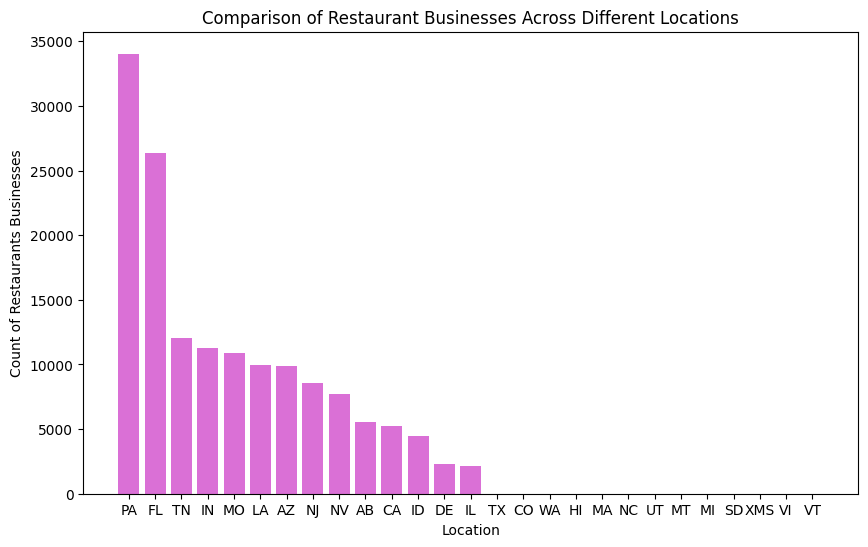

In [ ]:
import matplotlib.pyplot as plt

locations = word_counts_df['Word']
count_of_businesses = word_counts_df['Count']

plt.figure(figsize=(10, 6))
plt.bar(locations, count_of_businesses,  color= 'orchid' )
plt.xlabel('Location')
plt.ylabel('Count of Restaurants Businesses')
plt.title('Comparison of Restaurant Businesses Across Different Locations')
plt.show()

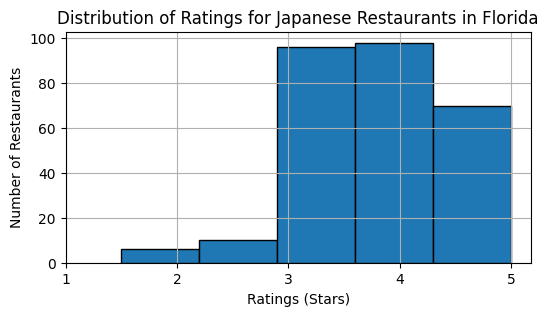

In [ ]:
plt.figure(figsize=(6, 3))
fl_japanese_restaurants['stars'].hist(bins=5, edgecolor='black')
plt.title('Distribution of Ratings for Japanese Restaurants in Florida')
plt.xlabel('Ratings (Stars)')
plt.ylabel('Number of Restaurants')
plt.xticks(range(1, 6))
plt.show()


#Step 2: Exploratory Data Analysis (EDA)
Calculate summary statistics and visualize data from the filtered dataset.

# Why should I choose a Japanese restaurant?
This would involve comparing the average ratings and possibly other metrics like the number of reviews or revenue estimates to make a case for Japanese restaurants.

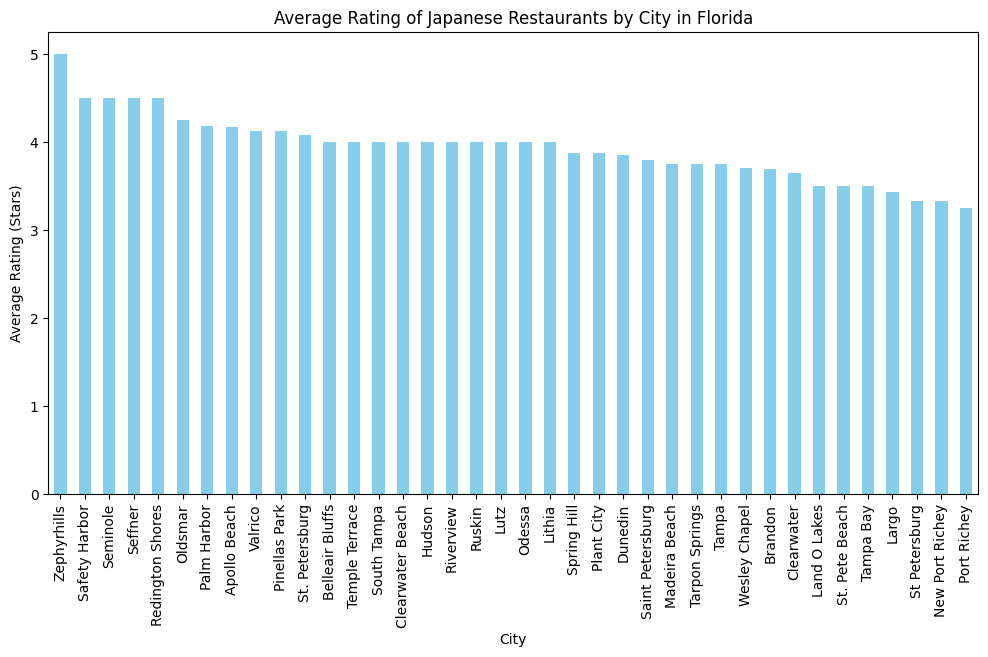

In [ ]:
# Group by city and calculate the average rating
city_ratings = fl_japanese_restaurants.groupby('city')['stars'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating of Japanese Restaurants by City in Florida')
plt.xlabel('City')
plt.ylabel('Average Rating (Stars)')
plt.show()

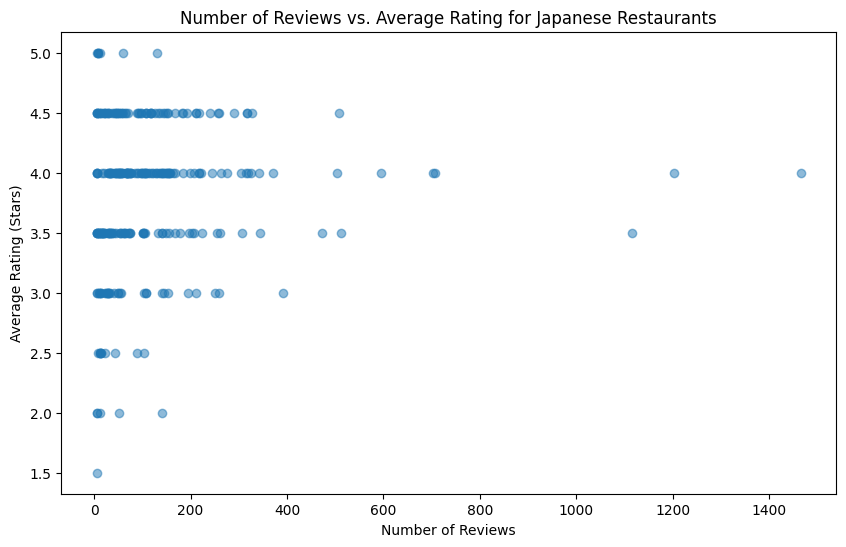

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(fl_japanese_restaurants['review_count'], fl_japanese_restaurants['stars'], alpha=0.5)
plt.title('Number of Reviews vs. Average Rating for Japanese Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating (Stars)')
plt.show()

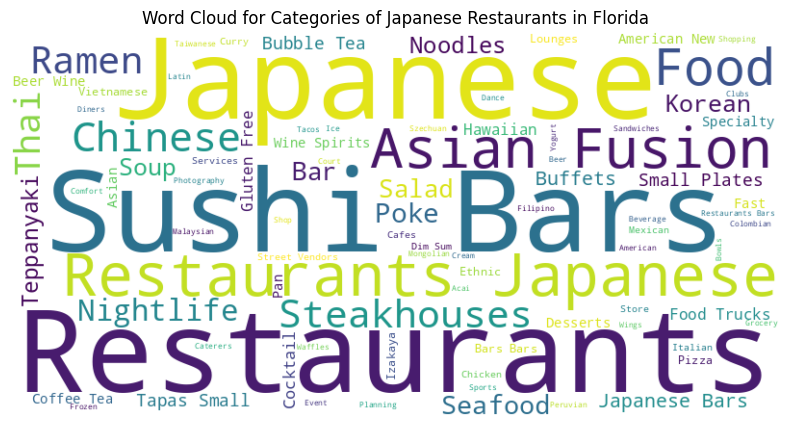

In [ ]:
from wordcloud import WordCloud

# Join all the category strings into one large string
all_categories = ' '.join(fl_japanese_restaurants['categories'].fillna(''))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Categories of Japanese Restaurants in Florida')
plt.show()

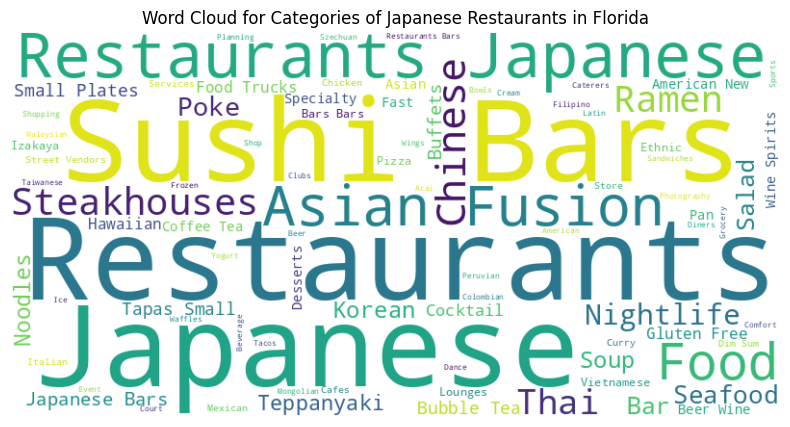

In [ ]:
from wordcloud import WordCloud

# Join all the category strings into one large string
all_categories = ' '.join(fl_japanese_restaurants['categories'].fillna(''))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Categories of Japanese Restaurants in Florida')
plt.show()

In [ ]:
# Calculate the average rating for all restaurants in Florida
avg_rating_all_fl = business_df['stars'].mean()

# Calculate the average rating for Japanese restaurants in Florida
avg_rating_japanese_fl = fl_japanese_restaurants['stars'].mean()

# Compare the average ratings to make a decision
print(f"Average Rating for all restaurants in FL: {avg_rating_all_fl}")
print(f"Average Rating for Japanese restaurants in FL: {avg_rating_japanese_fl}")

if avg_rating_japanese_fl > avg_rating_all_fl:
    print("Japanese restaurants are rated higher on average than other restaurants in Florida, indicating a preference among customers.")
else:
    print("Japanese restaurants have room for improvement or innovation to attract more customers.")

Average Rating for all restaurants in FL: 3.6109570831750855
Average Rating for Japanese restaurants in FL: 3.8125
Japanese restaurants are rated higher on average than other restaurants in Florida, indicating a preference among customers.


# Q2: Why are the reviews on average 3?
To understand why the reviews are averaging around a rating of 3, you can perform sentiment analysis and extract common themes that might be causing dissatisfaction:

## New section

In [ ]:
# from textblob import TextBlob

# # # Assuming 'fl_japanese_restaurants' DataFrame is available with 'text' for review texts
# # # Function to calculate sentiment polarity
# # def calculate_sentiment(text):
# #     return TextBlob(text).sentiment.polarity

# # # Apply the function to the reviews
# # fl_japanese_restaurants['sentiment_polarity'] = fl_japanese_reviews['text'].apply(calculate_sentiment)

# # # Get the average sentiment polarity
# # avg_sentiment = fl_japanese_restaurants['sentiment_polarity'].mean()
# # print(f"Average sentiment polarity of reviews: {avg_sentiment}")

# from textblob import TextBlob
# import pandas as pd

# # Assuming 'fl_japanese_reviews' DataFrame is already defined and contains a 'text' column with review texts

# # Function to calculate sentiment polarity
# def calculate_sentiment(text):
#     return TextBlob(text).sentiment.polarity

# # Calculate sentiment polarity for each review
# # Create a new column for sentiment polarity to avoid SettingWithCopyWarning
# fl_japanese_reviews['sentiment_polarity'] = fl_japanese_reviews['text'].apply(calculate_sentiment)

# # Now, if you wish to calculate the average sentiment polarity across all reviews:
# avg_sentiment = fl_japanese_reviews['sentiment_polarity'].mean()
# print(f"Average sentiment polarity of reviews: {avg_sentiment}")


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'fl_japanese_reviews' contains a 'sentiment_polarity' column with calculated sentiment scores

# # Set the Seaborn style to 'whitegrid' for better visibility of ticks
# sns.set_style('whitegrid')

# # Set up the matplotlib figure
# fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# # Histogram of sentiment polarity
# # Set the number of bins, color, and add grid
# axes[0].hist(fl_japanese_reviews['sentiment_polarity'], bins=30, color='skyblue')
# axes[0].set_title('Distribution of Sentiment Polarity')
# axes[0].set_xlabel('Sentiment Polarity')
# axes[0].set_ylabel('Frequency')

# # Boxplot of sentiment polarity
# # Set the color of the boxplot and make it horizontal
# axes[1].boxplot(fl_japanese_reviews['sentiment_polarity'], vert=False, patch_artist=True, boxprops=dict(facecolor='cyan'))
# axes[1].set_title('Boxplot of Sentiment Polarity')
# axes[1].set_xlabel('Sentiment Polarity')

# # Set the color of the grid to white for visibility
# axes[1].yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
# axes[1].xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)

# # Set axis limits if needed, for example:
# # axes[0].set_xlim([-1, 1])
# # axes[1].set_xlim([-1, 1])

# # Adjust the layout to make sure nothing is cut off
# plt.tight_layout()
# plt.show()


Histogram (Left Plot):

The histogram shows the frequency distribution of sentiment polarity scores from the reviews.
Most of the reviews have a sentiment polarity score between 0 and 0.25, indicating a generally positive sentiment.
The shape of the histogram is roughly bell-shaped, suggesting a normal-like distribution of sentiment scores, but with a skew towards the positive side (since the peak is to the right of the center).
There are very few reviews with extremely negative sentiment (close to -1), and similarly, there are fewer extremely positive reviews (close to 1) compared to the number of moderately positive reviews.
Boxplot (Right Plot):

The boxplot summarizes the distribution of sentiment polarity scores.
The box represents the interquartile range (IQR), which contains the middle 50% of the scores. The line in the middle of the box is the median, which seems to be slightly above 0, confirming the positive skew seen in the histogram.
The "whiskers" of the boxplot indicate the range of the data, excluding outliers, which extends from roughly -0.25 to 0.6.
There are a number of outliers on both the low and high ends of the sentiment score range, as indicated by the individual points beyond the whiskers. These outliers represent reviews with sentiment scores that are unusually low or high compared to the bulk of the data.
Overall Interpretation:

The majority of the reviews express a positive sentiment towards the Japanese restaurants, with the median sentiment being positive.
There is a variety of sentiment expressed in the reviews, including some that are neutral and some that are negative, but these are less frequent.
The presence of outliers on both ends suggests that while most reviews are positive, there are some customers who had distinctly negative or exceptionally positive experiences.
This kind of analysis can be very useful for understanding customer sentiment towards a product or service, and it could be used to inform business decisions, marketing strategies, and customer service initiatives.

# Identifying outlier reviews

In [ ]:
# import pandas as pd

# # Calculate IQR
# Q1 = fl_japanese_reviews['sentiment_polarity'].quantile(0.25)
# Q3 = fl_japanese_reviews['sentiment_polarity'].quantile(0.75)
# IQR = Q3 - Q1

# # Define bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter reviews that are outliers
# outliers_df = fl_japanese_reviews[
#     (fl_japanese_reviews['sentiment_polarity'] < lower_bound) |
#     (fl_japanese_reviews['sentiment_polarity'] > upper_bound)
# ]

ANalyzing outlier reviews

In [ ]:
# # Display the text of the outlier reviews
# for index, review in outliers_df.iterrows():
#     print(f"Review ID: {index}")
#     print(f"Sentiment Polarity: {review['sentiment_polarity']}")
#     print(f"Review Text: {review['text']}\n")
#     print("---\n")

# Addressing Outliers

In [ ]:
# # Example function to process the review text of outliers
# def process_outlier_reviews(df):
#     for index, review in df.iterrows():
#         sentiment = review['sentiment_polarity']
#         text = review['text']
#         # If the sentiment is low, it might indicate a negative outlier
#         if sentiment < lower_bound:
#             print(f"Negative outlier found (Sentiment: {sentiment}):")
#             # Insert your code for processing negative reviews
#         elif sentiment > upper_bound:
#             print(f"Positive outlier found (Sentiment: {sentiment}):")
#             # Insert your code for processing positive reviews
#         print(f"Review Text: {text}\n")
#         print("---\n")

# # Call the function with the identified outliers
# process_outlier_reviews(outliers_df)


In [ ]:
# import matplotlib.pyplot as plt

# # Assuming 'fl_japanese_reviews' is your DataFrame and it includes 'sentiment_polarity'

# # Define your lower and upper bounds for outliers based on IQR or standard deviation
# # Here's an example using the IQR
# Q1 = fl_japanese_reviews['sentiment_polarity'].quantile(0.25)
# Q3 = fl_japanese_reviews['sentiment_polarity'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.scatter(fl_japanese_reviews.index, fl_japanese_reviews['sentiment_polarity'], color='skyblue', label='Regular Reviews')
# plt.scatter(outliers_df.index, outliers_df['sentiment_polarity'], color='red', label='Outliers')
# plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound for Outliers')
# plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound for Outliers')
# plt.title('Sentiment Polarity Scatter Plot with Outliers Highlighted')
# plt.xlabel('Review Index')
# plt.ylabel('Sentiment Polarity')
# plt.legend()
# plt.show()


In [ ]:
# from wordcloud import WordCloud

# # Assuming 'outliers_df' contains the outliers with a 'text' column for review texts
# positive_outliers = outliers_df[outliers_df['sentiment_polarity'] > upper_bound]['text']
# negative_outliers = outliers_df[outliers_df['sentiment_polarity'] < lower_bound]['text']

# # Generate word clouds
# positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_outliers))
# negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_outliers))

# # Display the word clouds
# fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# axes[0].imshow(positive_wordcloud, interpolation='bilinear')
# axes[0].set_title('Positive Outliers Word Cloud')
# axes[0].axis('off')

# axes[1].imshow(negative_wordcloud, interpolation='bilinear')
# axes[1].set_title('Negative Outliers Word Cloud')
# axes[1].axis('off')

# plt.tight_layout()
# plt.show()

# Step 3: Sentiment Analysis with LSTM
We'll create a sentiment analysis model using LSTM networks to understand public sentiment towards Japanese restaurants.

In [ ]:
# # Create a sentiment column based on stars
# fl_japanese['sentiment'] = fl_japanese['stars_x'].apply(lambda x: 1 if x > 3 else 0)

# # Preprocessing steps here - Ensure the text data is preprocessed
# # Assuming 'text' column is preprocessed and tokenized
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(fl_japanese['text'])

# sequences = tokenizer.texts_to_sequences(fl_japanese['text'])
# data = pad_sequences(sequences, maxlen=200)

# # Correct the DataFrame name when splitting the data
# X_train, X_test, y_train, y_test = train_test_split(data, fl_japanese['sentiment'], test_size=0.2, random_state=42)

# # Define LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=5000, output_dim=128))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
172/172 [==============================] - 149s 821ms/step - loss: 0.3347 - accuracy: 0.9019 - val_loss: 0.3159 - val_accuracy: 0.9001
Epoch 2/10
172/172 [==============================] - 116s 673ms/step - loss: 0.2826 - accuracy: 0.9041 - val_loss: 0.2943 - val_accuracy: 0.9001
Epoch 3/10
172/172 [==============================] - 119s 691ms/step - loss: 0.2408 - accuracy: 0.9085 - val_loss: 0.2932 - val_accuracy: 0.8935
Epoch 4/10
172/172 [==============================] - 135s 788ms/step - loss: 0.2099 - accuracy: 0.9177 - val_loss: 0.2974 - val_accuracy: 0.8941
Epoch 5/10
172/172 [==============================] - 116s 678ms/step - loss: 0.1855 - accuracy: 0.9285 - val_loss: 0.3141 - val_accuracy: 0.8886
Epoch 6/10
172/172 [==============================] - 117s 680ms/step - loss: 0.1678 - accuracy: 0.9361 - val_loss: 0.3312 - val_accuracy: 0.8750
Epoch 7/10
172/172 [==============================] - 117s 681ms/step - loss: 0.1445 - accuracy: 0.9467 - val_loss: 0.3628 -

In [ ]:
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you've preprocessed 'fl_japanese_reviews' and have a 'text' column with review texts
# and a 'stars' column for the rating

# Step 1: Preprocess text data
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(fl_japanese_reviews['text'])

# Convert the text to sequences
X = tokenizer.texts_to_sequences(fl_japanese_reviews['text'])
X = pad_sequences(X, maxlen=200)

# Step 2: Prepare labels (assuming 1 for positive sentiment and 0 for negative sentiment)
# Let's define ratings of 4 and above as positive, and the rest as negative
fl_japanese_reviews['sentiment'] = fl_japanese_reviews['stars'].apply(lambda x: 1 if x >= 4 else 0)
y = fl_japanese_reviews['sentiment'].values

# Step 3: Create the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=X.shape[1]))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

<ipython-input-24-8327d2b12ac7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_japanese_reviews['sentiment'] = fl_japanese_reviews['stars'].apply(lambda x: 1 if x >= 4 else 0)


Epoch 1/5
215/215 [==============================] - 174s 776ms/step - loss: 0.3313 - accuracy: 0.8572 - val_loss: 0.2281 - val_accuracy: 0.9091
Epoch 2/5
215/215 [==============================] - 166s 772ms/step - loss: 0.2015 - accuracy: 0.9258 - val_loss: 0.2227 - val_accuracy: 0.9125
Epoch 3/5
215/215 [==============================] - 160s 747ms/step - loss: 0.1661 - accuracy: 0.9403 - val_loss: 0.2200 - val_accuracy: 0.9160
Epoch 4/5
215/215 [==============================] - 166s 773ms/step - loss: 0.1481 - accuracy: 0.9468 - val_loss: 0.2269 - val_accuracy: 0.9150
Epoch 5/5
215/215 [==============================] - 11s 53ms/step - loss: 0.2255 - accuracy: 0.9147
Test Accuracy: 91.47%


Epoch 1/5
215/215 [==============================] - 171s 793ms/step - loss: 0.1206 - accuracy: 0.9574 - val_loss: 0.2460 - val_accuracy: 0.9155
Epoch 2/5
215/215 [==============================] - 160s 747ms/step - loss: 0.1113 - accuracy: 0.9618 - val_loss: 0.2702 - val_accuracy: 0.9118
Epoch 3/5
215/215 [==============================] - 158s 735ms/step - loss: 0.1028 - accuracy: 0.9646 - val_loss: 0.2660 - val_accuracy: 0.9097
Epoch 4/5
215/215 [==============================] - 165s 768ms/step - loss: 0.0836 - accuracy: 0.9711 - val_loss: 0.2716 - val_accuracy: 0.9062
Epoch 5/5
215/215 [==============================] - 160s 744ms/step - loss: 0.0773 - accuracy: 0.9744 - val_loss: 0.3233 - val_accuracy: 0.9075


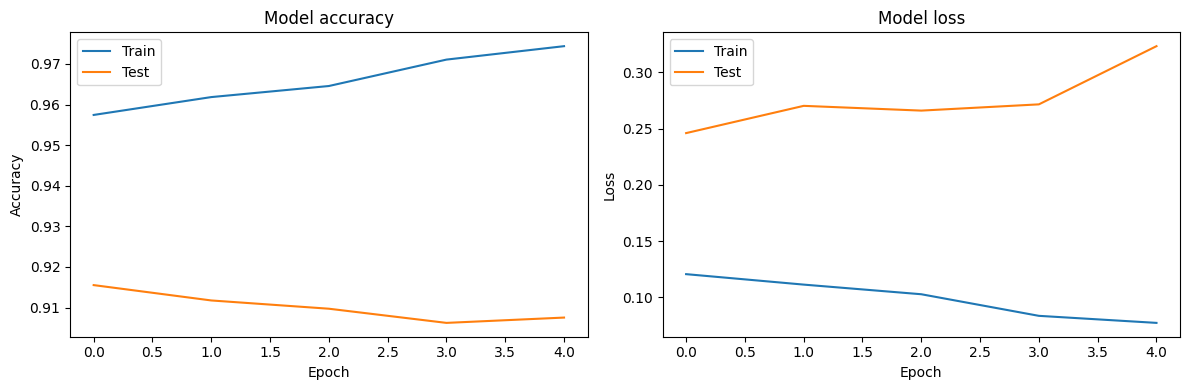

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


#Step 4: Topic Modeling with LDA
Perform LDA on reviews to identify common topics.

# Q3: What are good and bad points in reviews?
# To extract good and bad points from reviews, you will conduct topic modeling:

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Assume 'fl_japanese' has a 'text' column with preprocessed text
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(fl_japanese_reviews['text'])

LDA = LatentDirichletAllocation(n_components=10, random_state=42)
LDA.fit(dtm)

# Display topics
for i, topic in enumerate(LDA.components_):
  print(f'Top 10 words for topic #{i}:')
  print([cv.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
  print('\n')

Top 10 words for topic #0:
['fresh', 'good', 'salad', 'fish', 'salmon', 'spicy', 'rolls', 'tuna', 'sushi', 'roll']


Top 10 words for topic #1:
['bar', 'just', 'bit', 'music', 'food', 'place', 'like', 'nice', 'really', 'good']


Top 10 words for topic #2:
['don', 'eat', 'got', 'ordered', 'came', 'just', 'good', 'place', 'like', 'food']


Top 10 words for topic #3:
['wait', 'came', 'sushi', 'table', 'just', 'minutes', 'time', 'service', 'order', 'food']


Top 10 words for topic #4:
['amazing', 'service', 'place', 'hour', 'rolls', 'good', 'happy', 'roll', 'great', 'sushi']


Top 10 words for topic #5:
['friendly', 've', 'best', 'fresh', 'good', 'service', 'food', 'great', 'place', 'sushi']


Top 10 words for topic #6:
['like', 'noodles', 'food', 'bowl', 'great', 'broth', 'place', 'good', 'pork', 'ramen']


Top 10 words for topic #7:
['like', 'people', 'blue', 'order', 'place', 'bowl', 'location', 'open', 'restaurant', 'poke']


Top 10 words for topic #8:
['chicken', 'meal', 'rice', 'grea

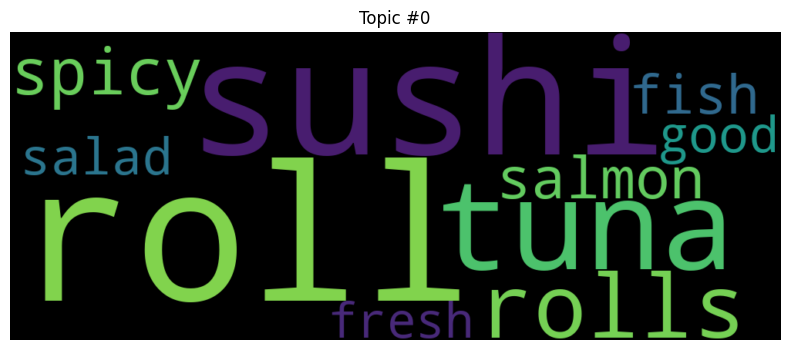

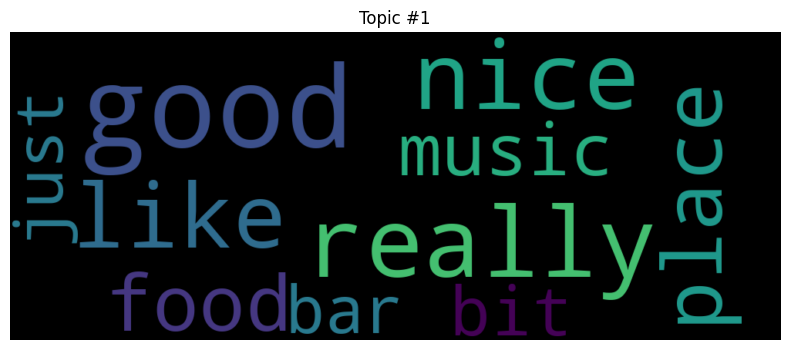

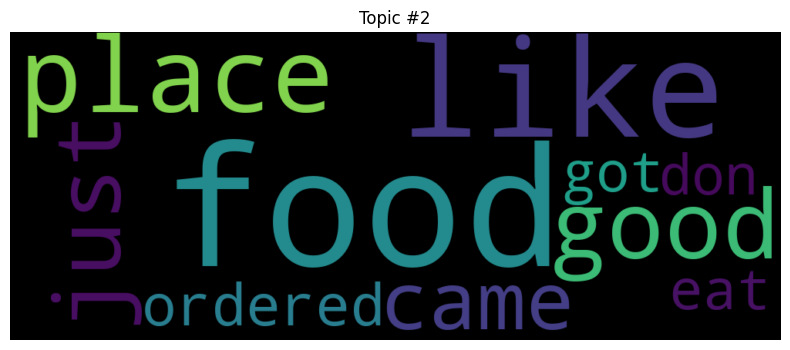

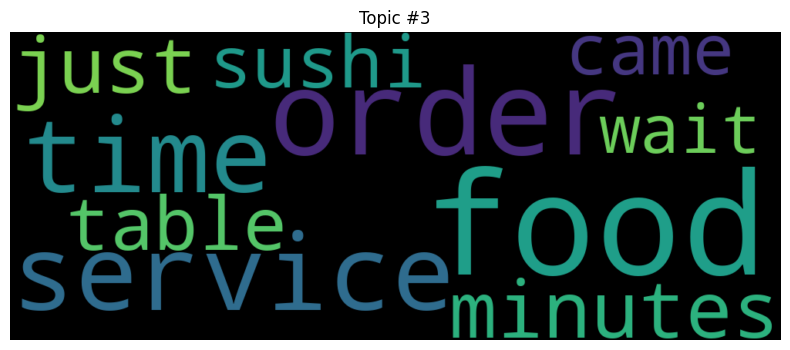

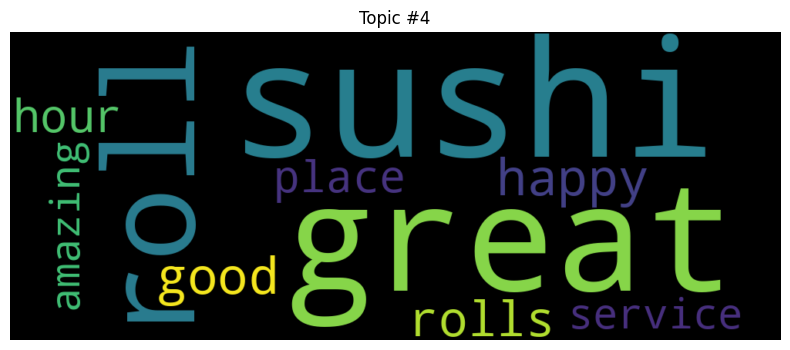

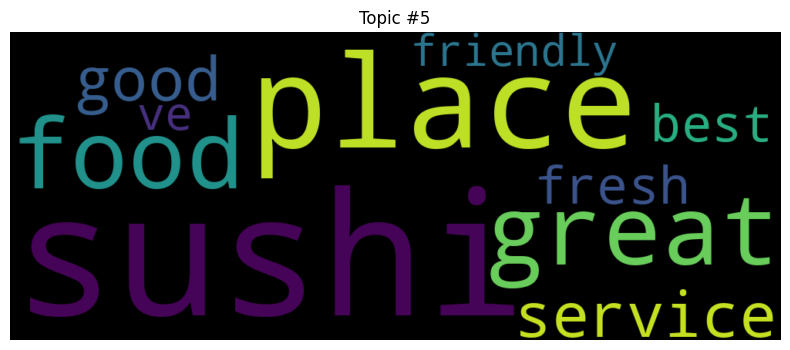

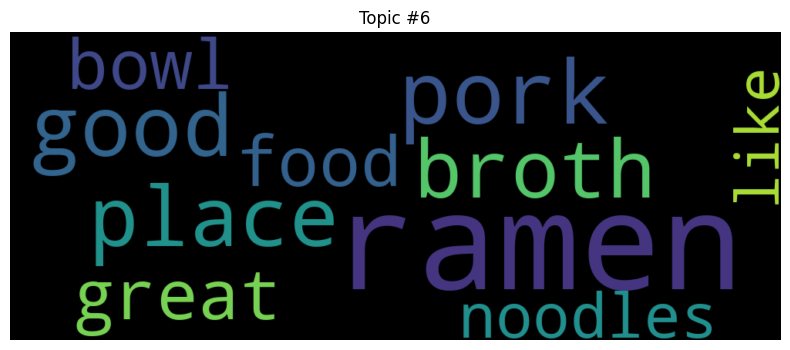

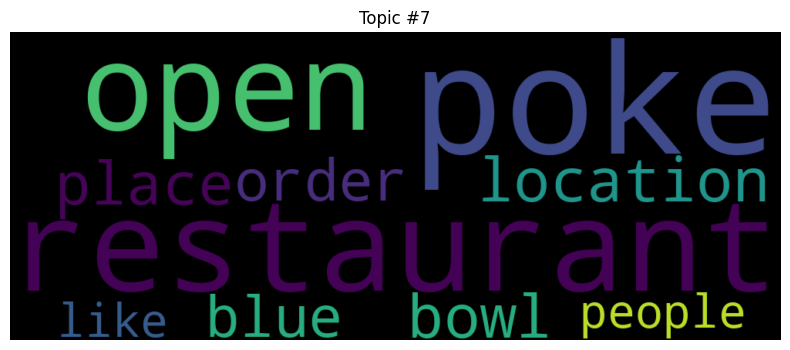

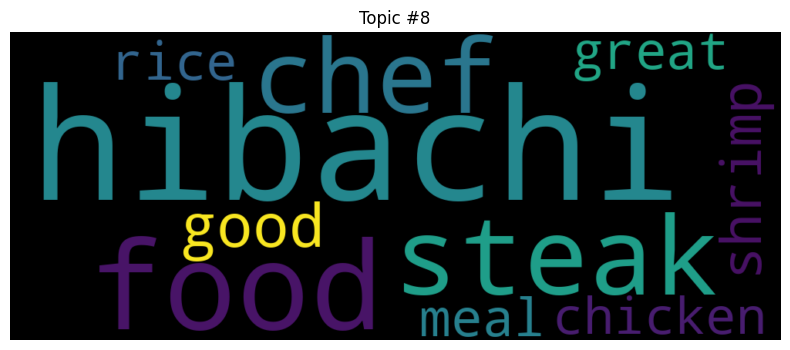

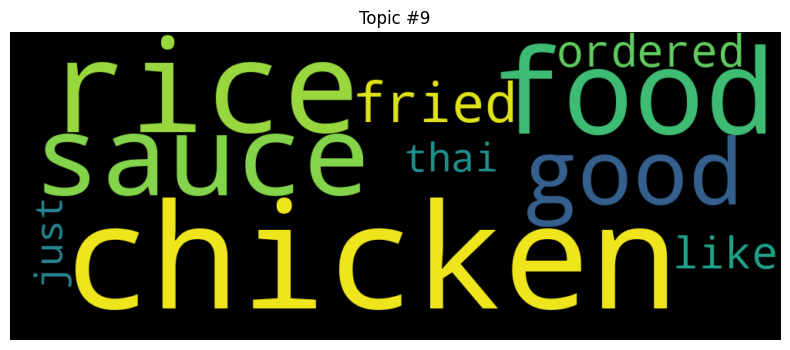

In [ ]:
#wordcloud for each topicfrom wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Clouds for each topic
for i, topic in enumerate(LDA.components_):
    plt.figure(figsize=(10, 4))
    wc = WordCloud(width=1000, height=400, max_words=10).generate_from_frequencies(dict(zip(cv.get_feature_names_out(), topic)))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Topic #{i}')
    plt.axis("off")
    plt.show()

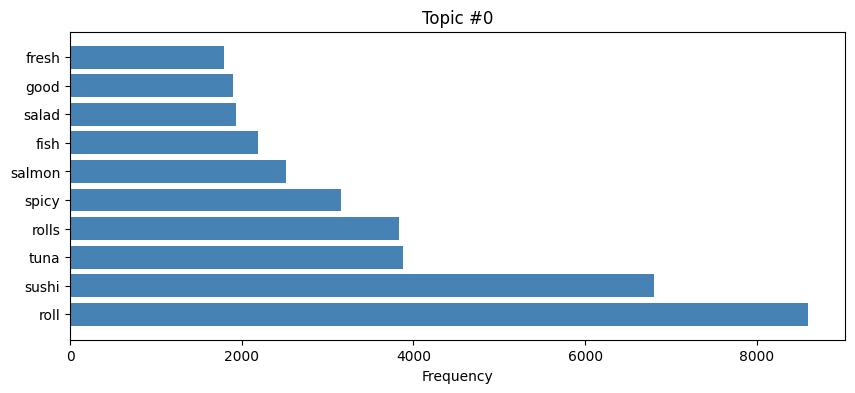

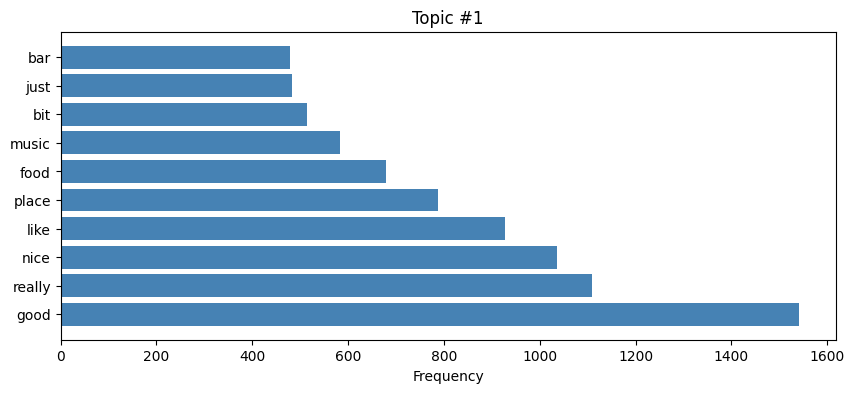

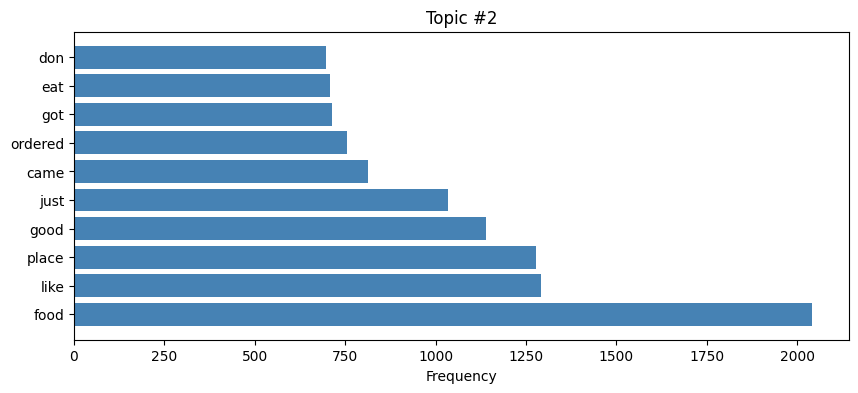

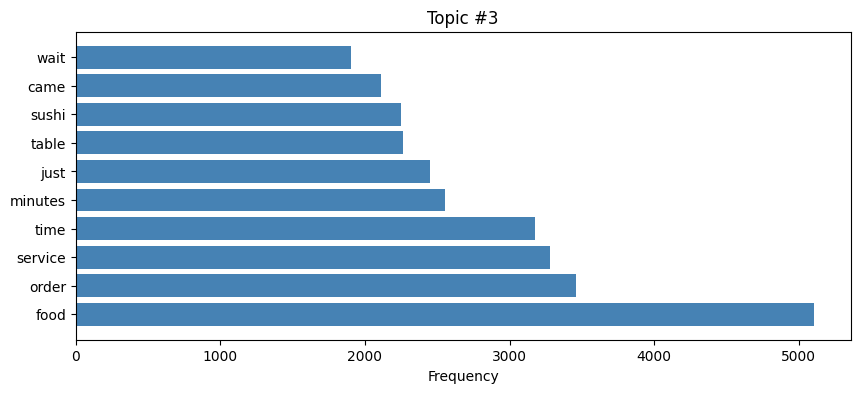

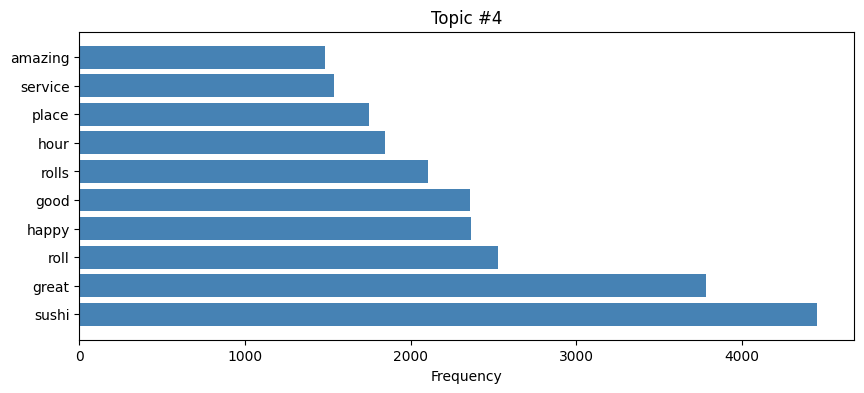

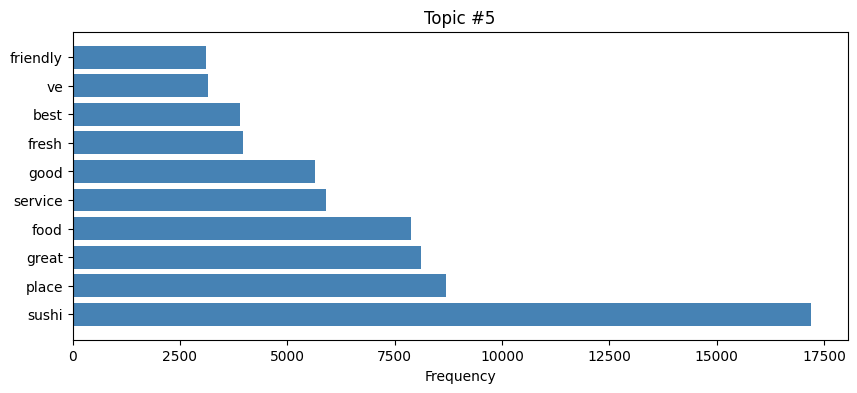

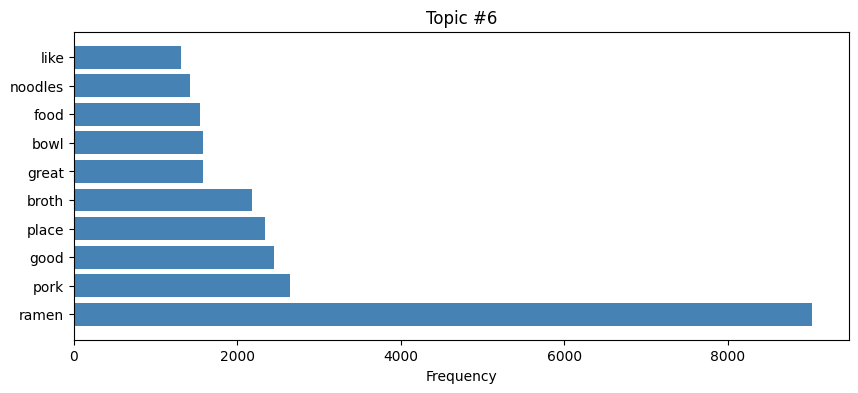

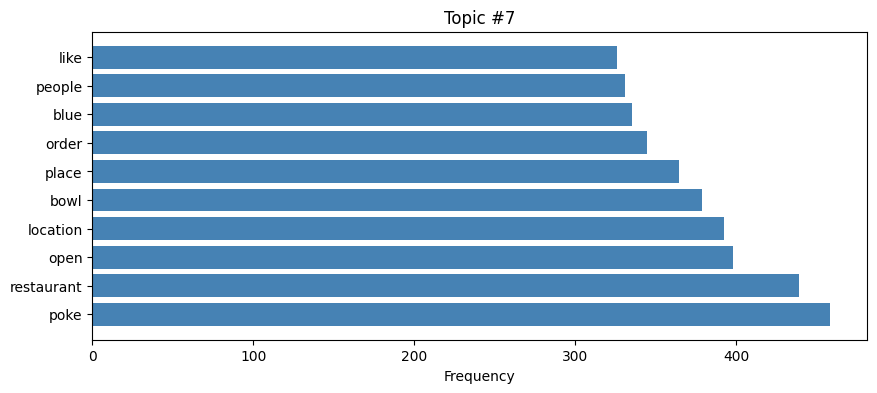

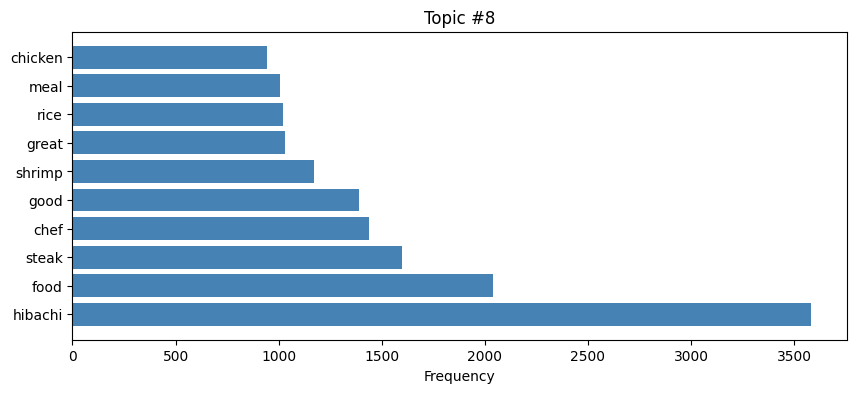

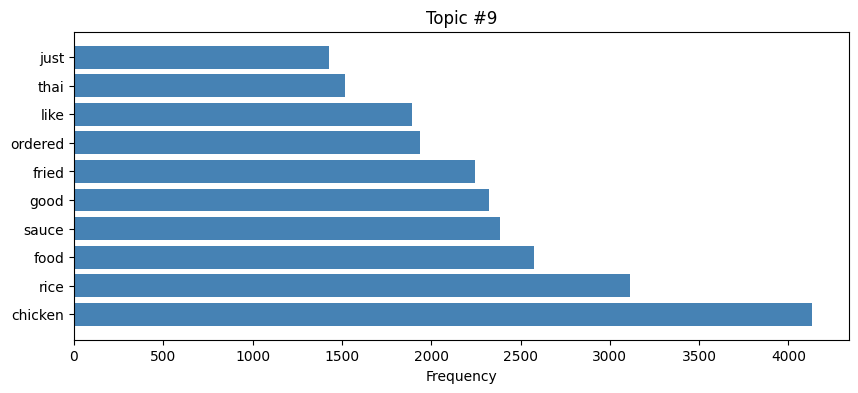

In [ ]:
# Generate Bar Charts for each topic
for i, topic in enumerate(LDA.components_):
    top_word_indices = topic.argsort()[-10:]
    plt.figure(figsize=(10, 4))
    plt.barh(range(10), topic[top_word_indices], color='steelblue', align='center')
    plt.yticks(range(10), [cv.get_feature_names_out()[index] for index in top_word_indices])
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.title(f'Topic #{i}')
    plt.xlabel('Frequency')
    plt.show()


# Step 5: Competitive Analysis with BERT Zero-shot
Classify reviews into categories without training using BERT's zero-shot classification.

In [ ]:
from transformers import pipeline

# Initialize the zero-shot classification pipeline with BART model
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

# Define topic categories
categories = ['food quality', 'service', 'ambience', 'price', 'location']

# Analyze a batch of reviews
results = []
for i, text_to_classify in enumerate(fl_japanese_reviews['text']):
    # Perform classification
    result = classifier(text_to_classify, categories)
    # Store results
    results.append(result)
    # Break after 5 reviews for demonstration purposes
    if i >= 4:
        break


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

# Step 6: Vizualization

In [2]:
!pip install jupyter
!pip install nbconvert

In [ ]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Copy of COURSE_PROJECT.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Copy of COURSE_PROJECT.ipynb to html
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 560, in convert_single_notebook
    output, resources = self.export_single_notebook(
  File "/usr/local/lib/python3.10/dist